# Exploratory Data Analysis 

In [2]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import rc 
from datetime import datetime as dt 
from matplotlib.font_manager import FontProperties
import seaborn as sns 
import numpy as np
%matplotlib inline 

# Setting a seaborn style for all graphs 
sns.set()

## Loading the data 

In [3]:
df=pd.read_csv('/Users/dasha/Downloads/Files/final_dataframe.csv',parse_dates=['Date Occurred_Time Occurred','Date Occurred','Time Occurred'],index_col=0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.head()

Date Occurred_Time Occurred    Area Name  \
0         2013-03-11 18:00:00  77th Street   
1         2010-01-22 23:00:00      Olympic   
2         2013-03-18 20:30:00    Southeast   
3         2010-11-10 18:00:00    Southeast   
4         2014-01-04 23:00:00      Topanga   

                     Crime Code Description Victim Age Victim Sex  \
0         INTIMATE PARTNER - SIMPLE ASSAULT       30.0          F   
1                          VEHICLE - STOLEN    Missing    Missing   
2                          VEHICLE - STOLEN       12.0    Missing   
3                          VEHICLE - STOLEN    Missing    Missing   
4  VANDALISM - MISDEAMEANOR ($399 OR UNDER)       84.0          M   

  Victim Descent     Premise Description Status Description  \
0              W     MULTI-UNIT DWELLING        Adult Other   
1        Missing                  STREET        Invest Cont   
2        Missing                  STREET        Invest Cont   
3        Missing                  STREET        Invest Cont   
4              W  SINGLE FAMILY DWELLING        Invest Cont   

              Location  Date Occurred               ...                 \
0  (33.9829, -118.3338)    2013-03-11               ...                  
1  (34.0454, -118.3157)    2010-01-22               ...                  
2   (33.942, -118.2717)    2013-03-18               ...                  
3  (33.9572, -118.2717)    2010-11-10               ...                  
4  (34.2009, -118.6369)    2014-01-04               ...                  

   Hour_sin      Hour_cos       Min_sin  Min_cos   Day_sin   Day_cos  \
0 -1.000000 -1.836970e-16  0.000000e+00      1.0  0.790776 -0.612106   
1 -0.258819  9.659258e-01  0.000000e+00      1.0 -0.968077 -0.250653   
2 -0.866025  5.000000e-01 -1.715001e-14      1.0 -0.485302 -0.874347   
3 -1.000000 -1.836970e-16  0.000000e+00      1.0  0.897805 -0.440394   
4 -0.258819  9.659258e-01  0.000000e+00      1.0  0.724793  0.688967   

      Month_sin  Month_cos                          Crime  \
0 -5.000000e-01   0.866025              Sex-Related Crime   
1 -8.660254e-01   0.500000              Robbery and Theft   
2  3.673940e-16  -1.000000              Robbery and Theft   
3 -8.660254e-01   0.500000              Robbery and Theft   
4  8.660254e-01  -0.500000  Vandalism and Property Damage   

                    Crime_Detailed  
0  Rape and Sexual Assault/Battery  
1     Vehicle/Transportation Theft  
2     Vehicle/Transportation Theft  
3     Vehicle/Transportation Theft  
4    Vandalism and Property Damage  

[5 rows x 25 columns]

## Looking into trends..

In [5]:
# Create a dataframe with separate column for the year of crime occurrance 
timed_data=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime']]
timed_data['Year']=timed_data['Date Occurred_Time Occurred'].dt.year

In [6]:
#Yearly data....

In [7]:
yearly_data=timed_data.drop(columns='Date Occurred_Time Occurred')
# Excluding 2018 since it does not contain full data yet 
yearly_data=yearly_data[yearly_data['Year']!=2018]
yearly_data=yearly_data.groupby(['Year','Area Name']).count()

In [8]:
yearly_data['Crime Count']=yearly_data['Crime']
yearly_data=yearly_data.drop(columns='Crime')

In [9]:
yearly_data=yearly_data.unstack(level='Area Name')

### Crime count by district ...

Text(0.5,1,'LA Crime Rate by District')

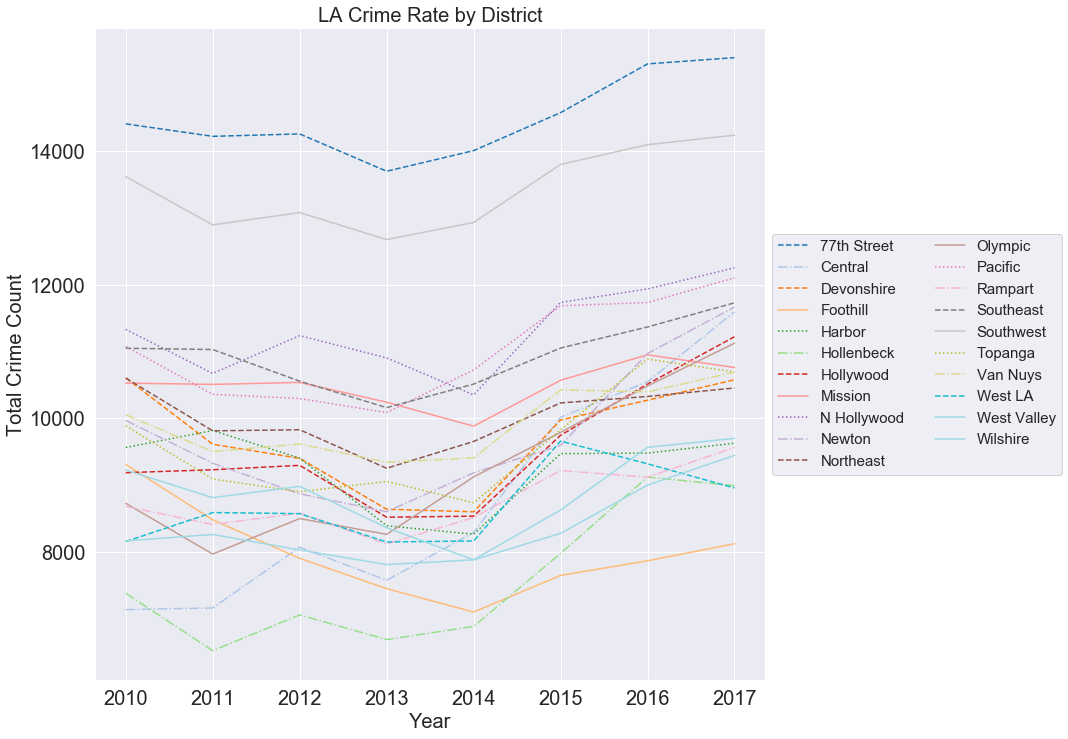

In [45]:
plot=yearly_data['Crime Count'].plot(by='Area Name',style=['--','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-','-',':','-.','--'],colormap='tab20',figsize=(12,12))
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15}, ncol=2,facecolor='inherit')
plt.ylabel('Crime Count',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('LA Crime Rate by District',fontsize=20)


Seems that 77th Street and Southwest districts are the most dangerous 
Hollenbeck, Central, Olympic, Hollywood and Newton Districts have rapid increases in crime 


Text(0.5,1,'Regions With Increasing and Decreasing Crime')

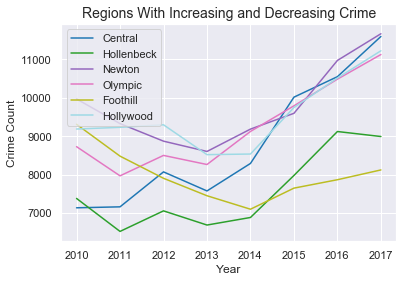

In [48]:
#Creating a separate graph for crime count in selected districts 
yearly_data['Crime Count'].plot(y=['Central','Hollenbeck','Newton','Olympic','Foothill','Hollywood'],colormap='tab20')
plt.legend(loc='upper left')
plt.xlabel('Year',fontsize=12)
plt.ylabel("Crime Count",fontsize=12)
plt.title('Regions With Increasing and Decreasing Crime',fontsize=14)

In [12]:
# Creating table with yearly crime counts segregated by types of crime 
yearly_bycrime=timed_data.drop(columns='Date Occurred_Time Occurred')
yearly_bycrime=yearly_bycrime[yearly_bycrime['Year']!=2018]

In [13]:
yearly_bycrime=yearly_bycrime.groupby(['Year','Area Name','Crime']).size().to_frame(name='Count')

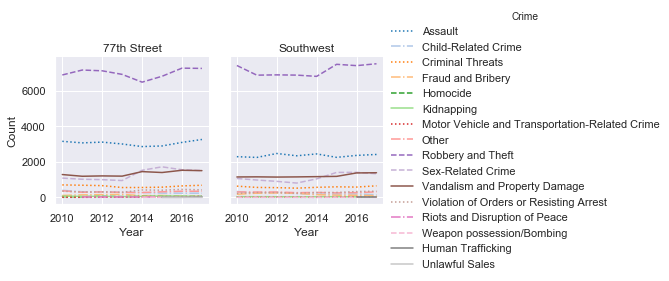

In [47]:
# Plotting crime coumt data for 77th Street and Southwest (split by crime count) 
most_dangerous=yearly_bycrime.reset_index()
most_dangerous.set_index(['Area Name'],inplace=True)
most_dangerous=most_dangerous.loc[['77th Street','Southwest']]
most_dangerous.reset_index(inplace=True)
g = sns.FacetGrid(most_dangerous, col="Area Name", hue="Crime",palette='tab20',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']})
g.map(plt.plot, "Year", "Count")
g.add_legend()
g.set_titles("{col_name}")

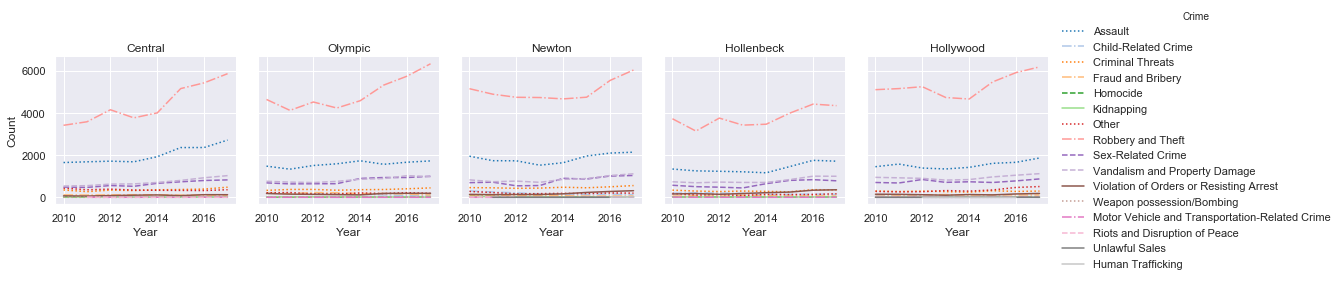

In [15]:
# Focus districts 

risingc_dist=yearly_bycrime.reset_index()
risingc_dist.set_index(['Area Name'],inplace=True)
risingc_dist=risingc_dist.loc[['Central','Olympic','Newton','Hollenbeck','Hollywood']]
risingc_dist.reset_index(inplace=True)
g = sns.FacetGrid(risingc_dist, col="Area Name", hue="Crime",palette='tab20',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']})
g.map(plt.plot, "Year", "Count")
g.add_legend()
g.set_titles("{col_name}")

### What crimes happend at what premises ???

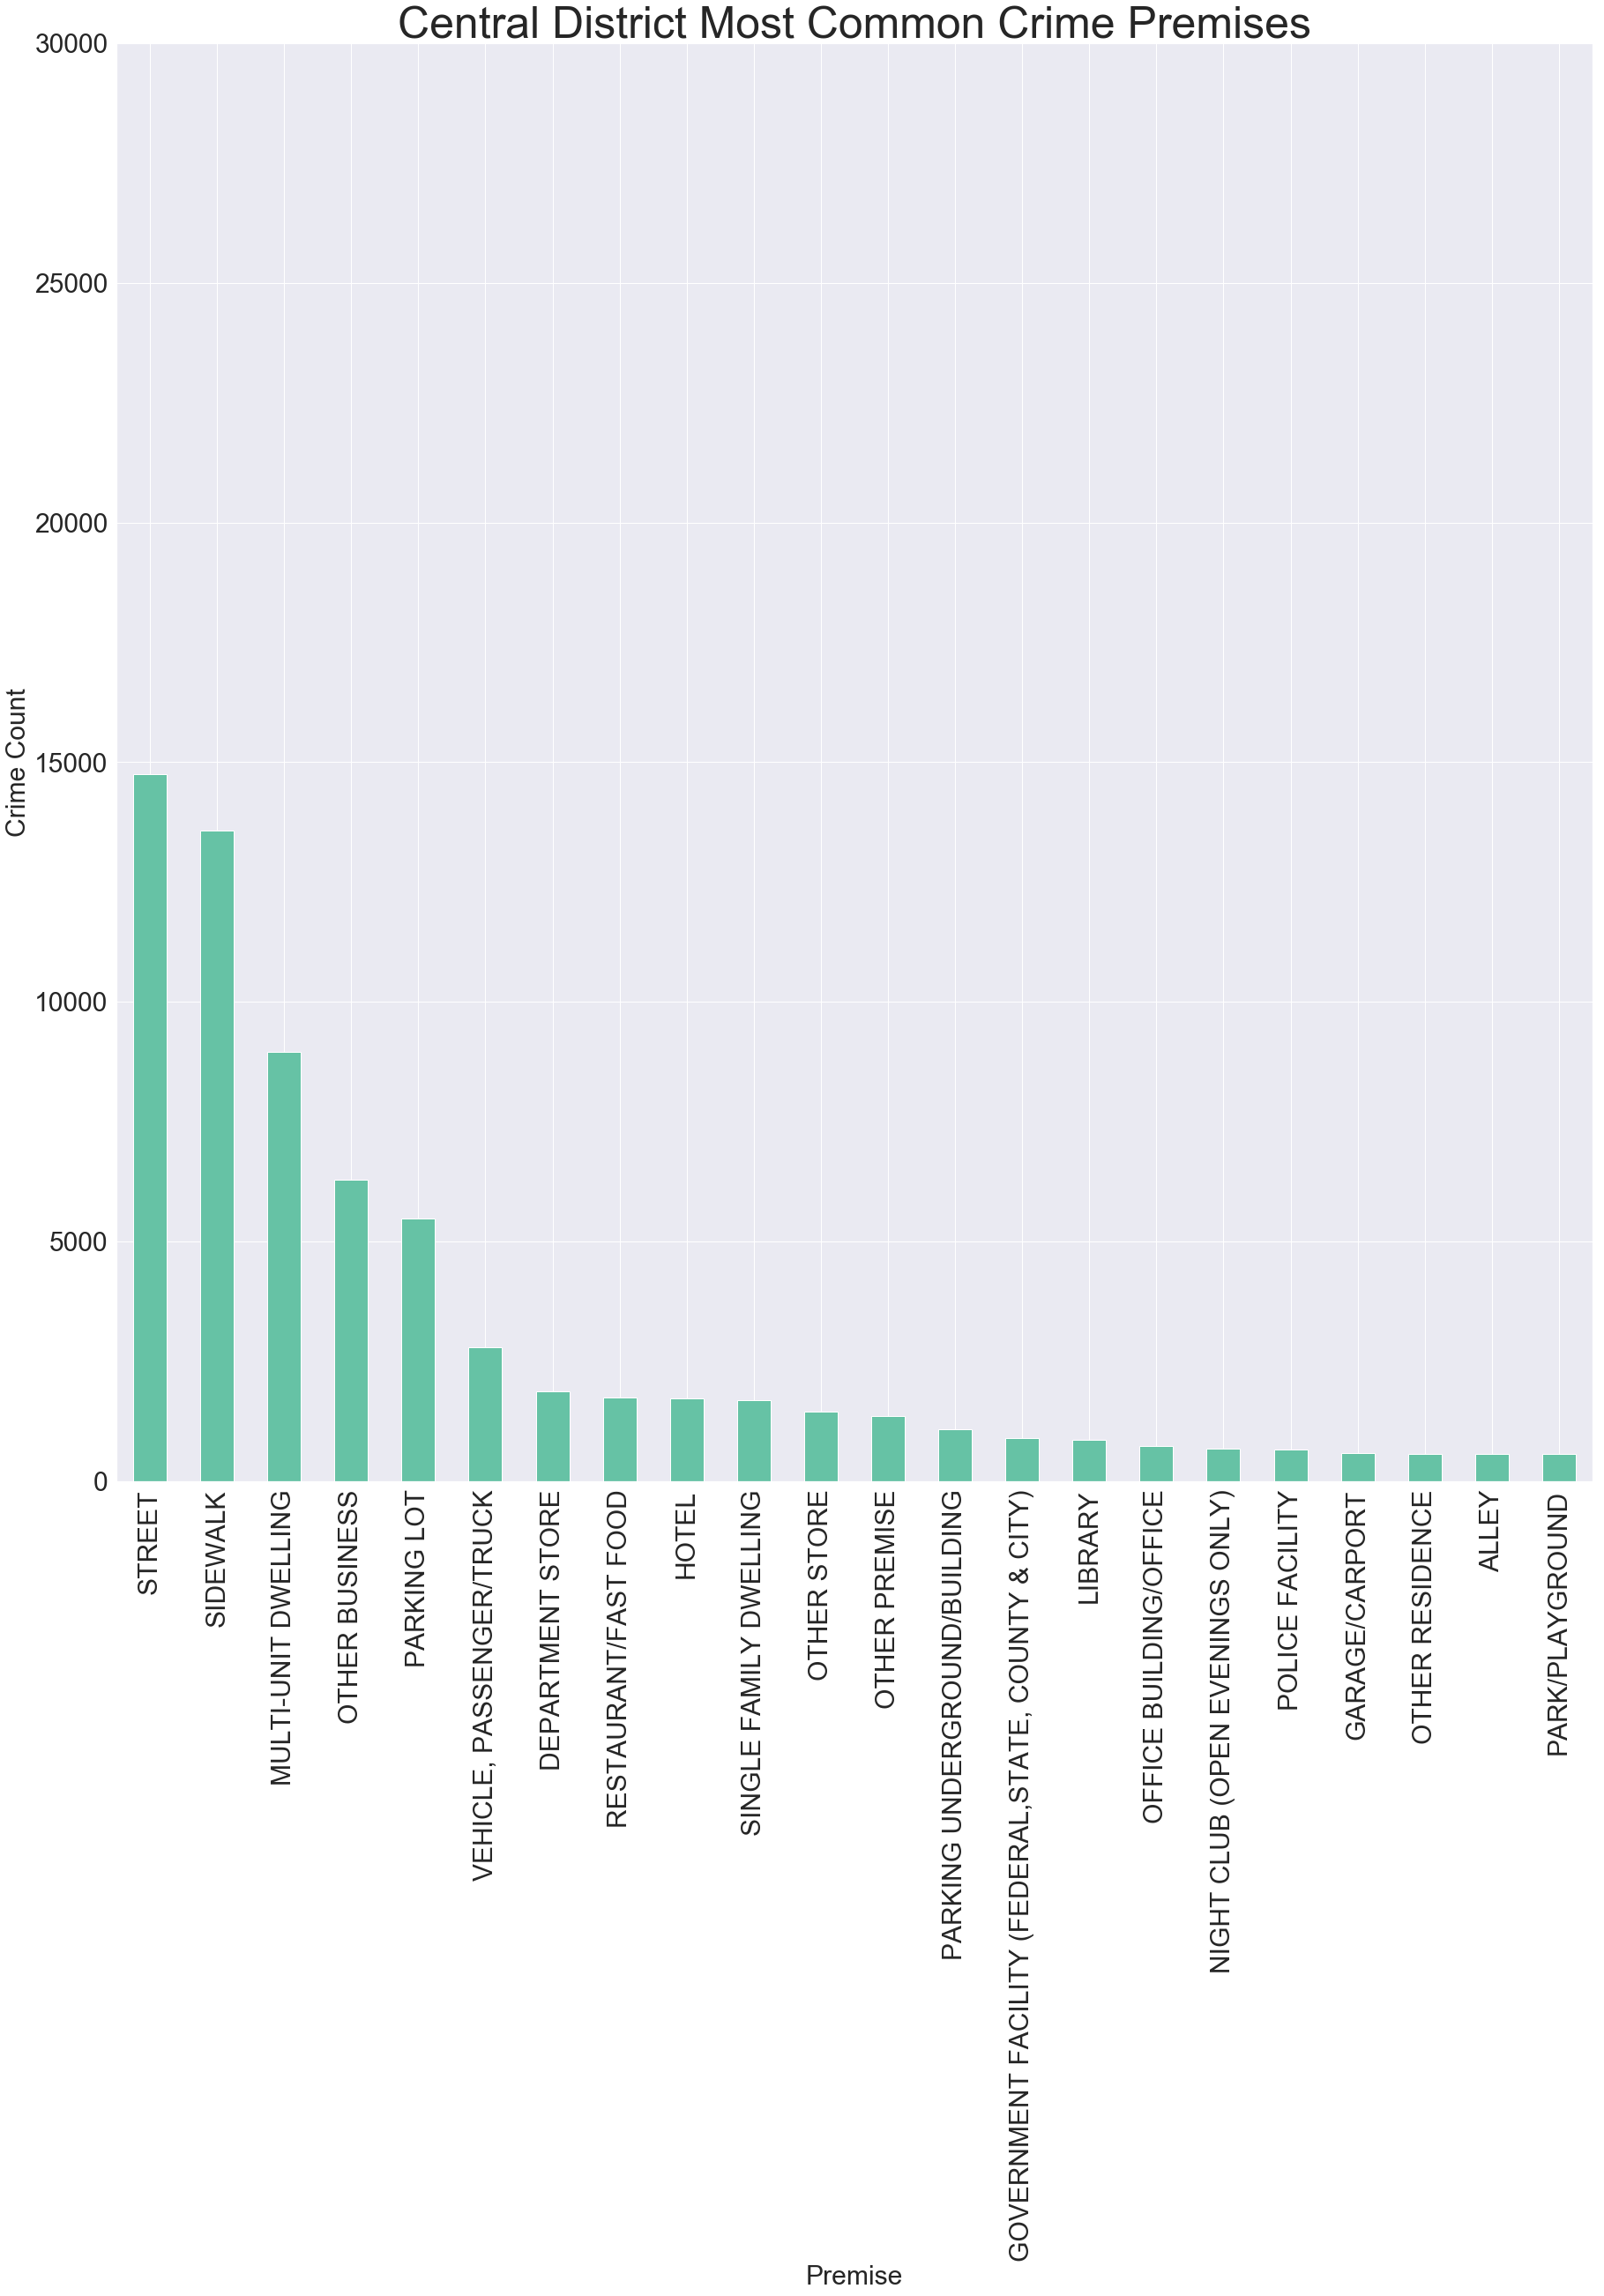

In [16]:
# Bar chart for Central District - crime count by crime 
area_premise=df.loc[:,['Premise Description','Area Name']]

def crime_counter(district,list_premise=0): 
    
    """Use list_premise=1 to return a list of top dangerous premises, 0 to just
    graph the most common crimepremise """
    
    premise=area_premise[area_premise['Area Name']==district]
    premise=premise.drop(columns='Area Name')
    premise=premise['Premise Description'].value_counts().to_frame('Count')
    premise=premise[premise['Count']>500]
    if list_premise==0: 
        premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Set2')
        plt.title(district +' District Most Common Crime Premises',fontsize=50)
        plt.xticks(fontsize=30)
        plt.ylim(0,30000)
        plt.yticks(fontsize=30)
        plt.ylabel('Crime Count',fontsize=30)
        plt.xlabel('Premise',fontsize=30)
    else: 
        return(list(premise.head(10).index))

crime_counter('Central')

In [50]:
# Bar chart for Central District - primise vs. crime count stacked by crime type 
crime_by_premise=df.loc[:,['Area Name','Crime','Premise Description']]
crime_by_premise.set_index('Area Name',inplace=True)
crime_by_premise=crime_by_premise.loc[['Central','Olympic','Newton','Hollenbeck','Hollywood']]

def prem_crime_counter(district): 
    crime_prem=crime_by_premise.loc[district]
    crime_prem.reset_index(inplace=True)
    crime_prem=crime_prem.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count')
    crime_prem.reset_index(inplace=True)
    crime_prem.drop(columns='Area Name',inplace=True)
    top_premise=crime_counter(district,1)
    crime_prem.set_index(['Premise Description','Crime'],inplace=True)
    crime_prem=crime_prem.unstack(level='Crime',fill_value=0)
    crime_prem['Count'].loc[top_premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
    plt.xticks(fontsize=120)
    plt.yticks(fontsize=120)
    plt.legend(loc='upper right',prop={'size':120})
    plt.title(((district)+' District'),fontsize=200)
    plt.xlabel('Premise',fontsize=200)
    plt.ylabel('Crime Count',fontsize=200)
    plt.tight_layout()
    
prem_crime_counter('Central')

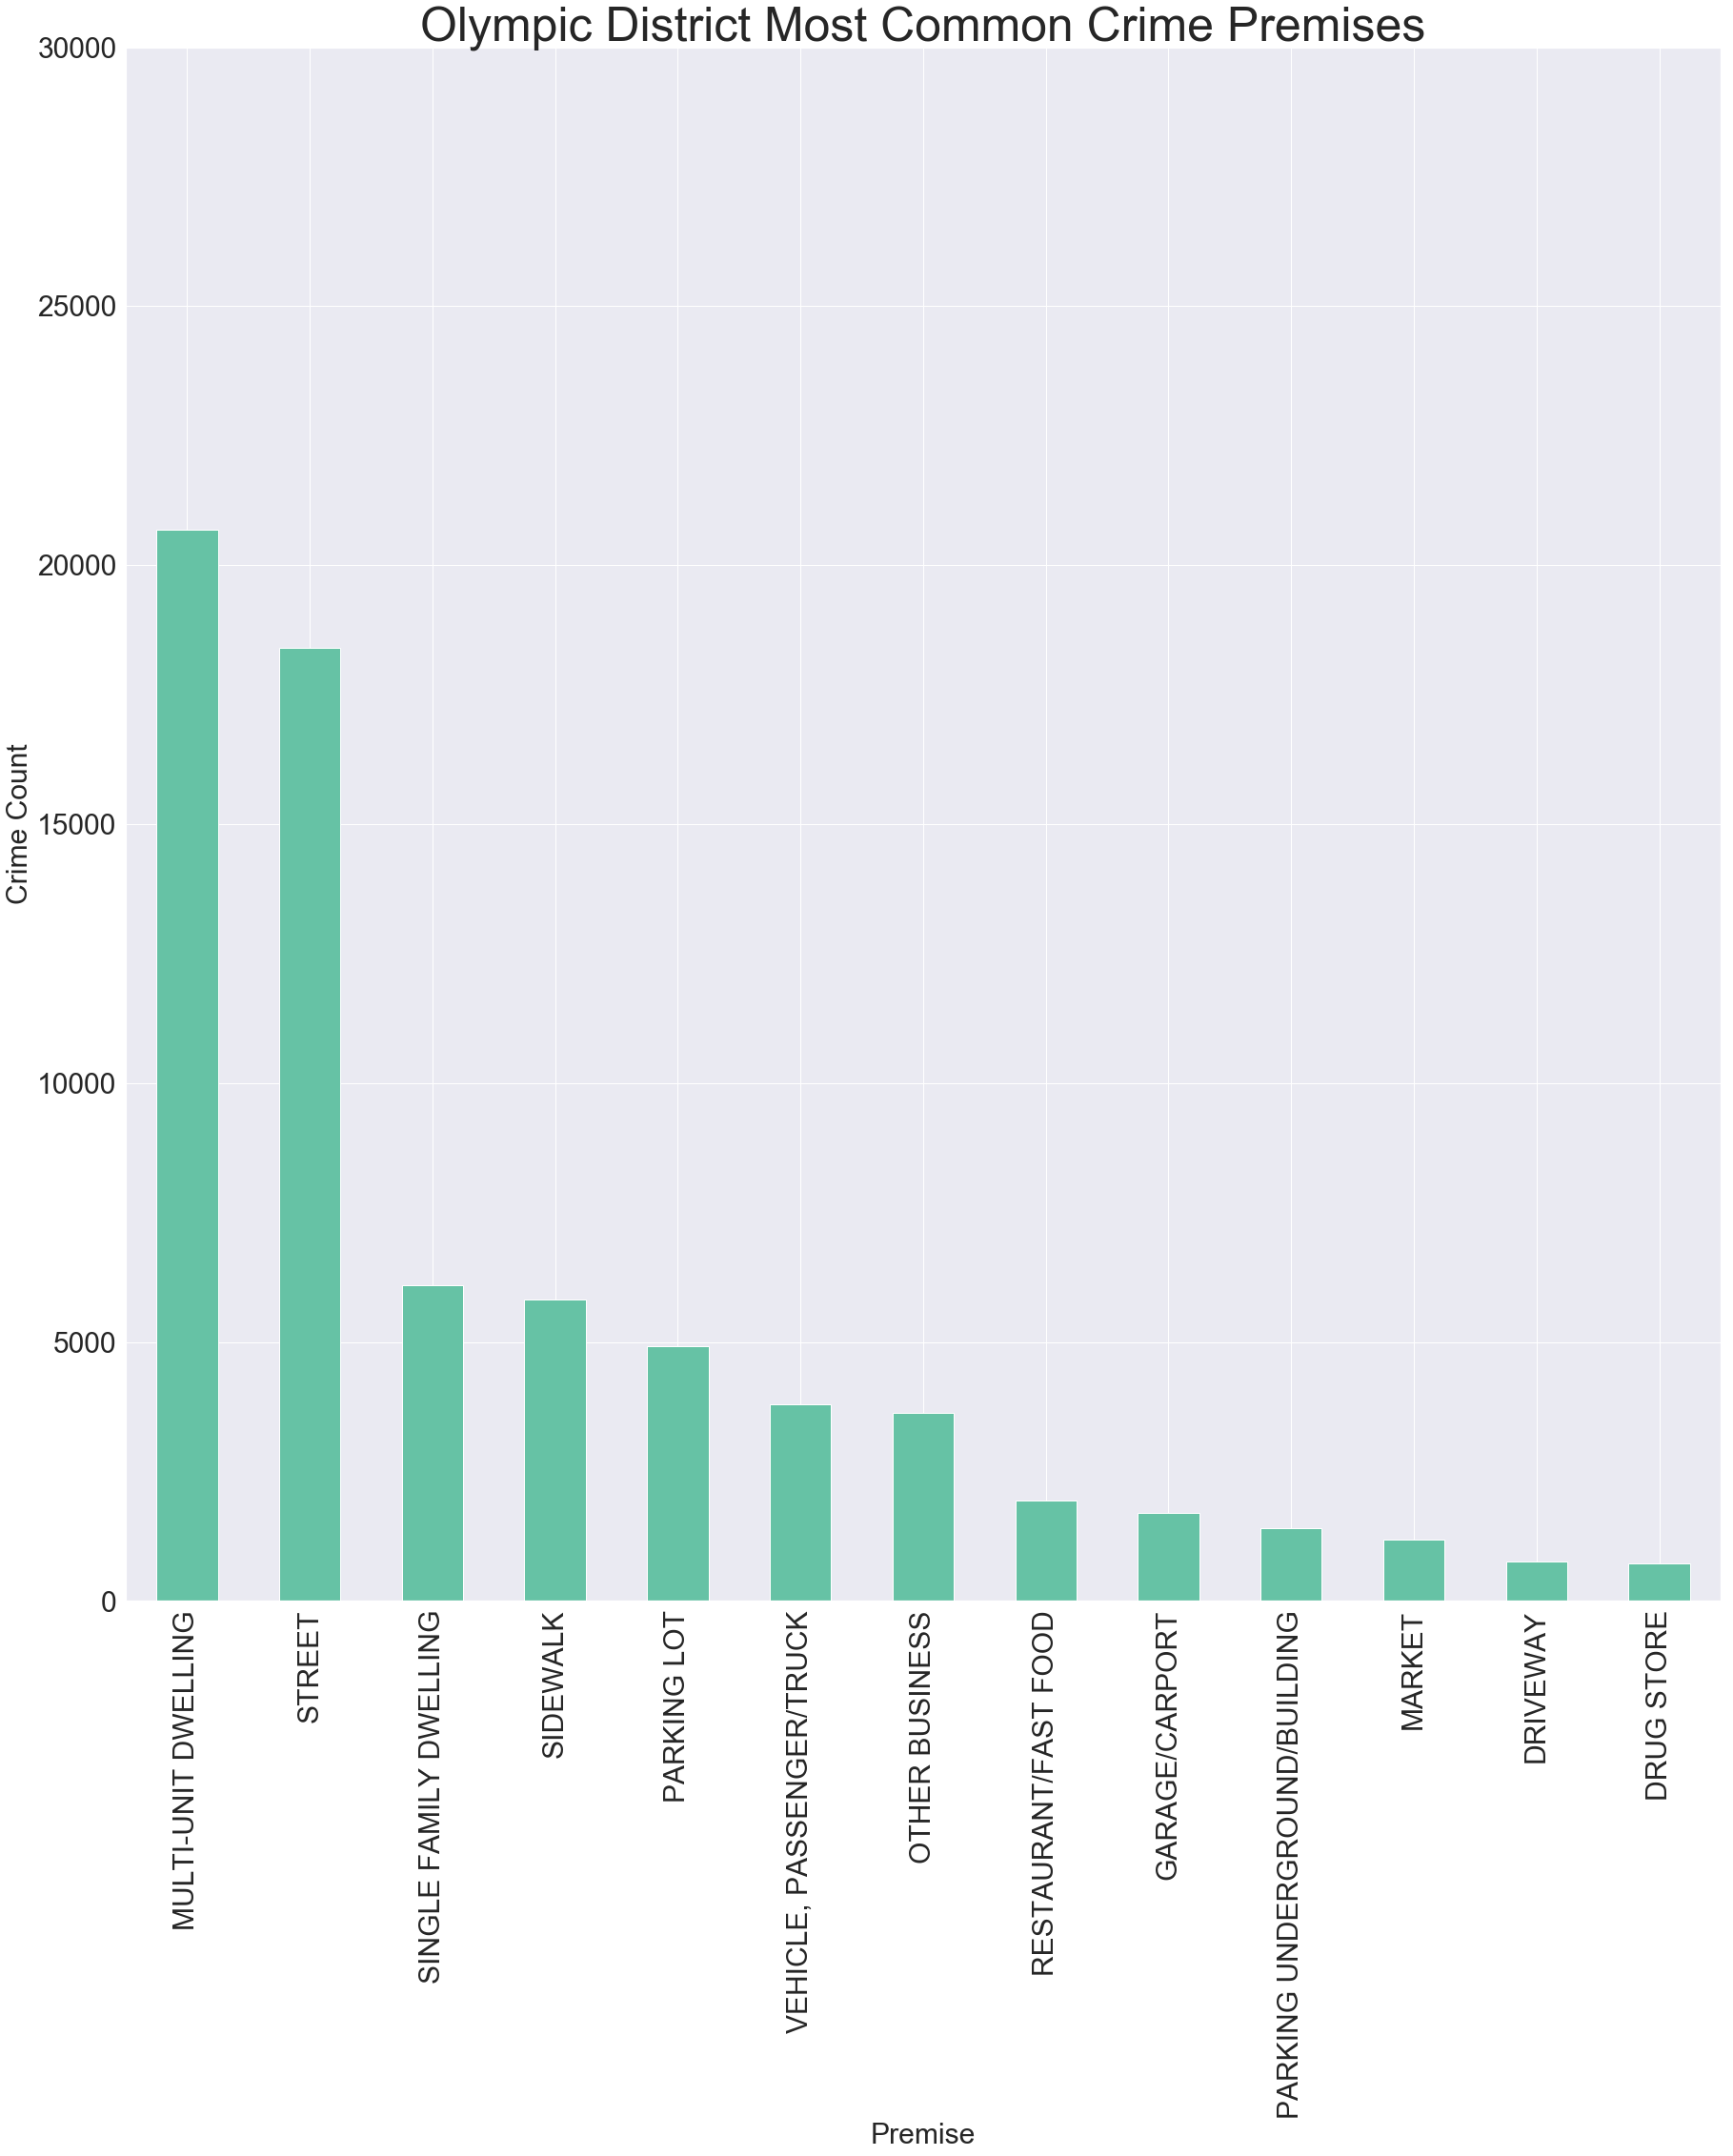

In [51]:
# Bar chart for Olympic District - crime count by crime
crime_counter('Olympic')

In [52]:
# Bar chart for Olympic District - primise vs. crime count stacked by crime type 
prem_crime_counter('Olympic')

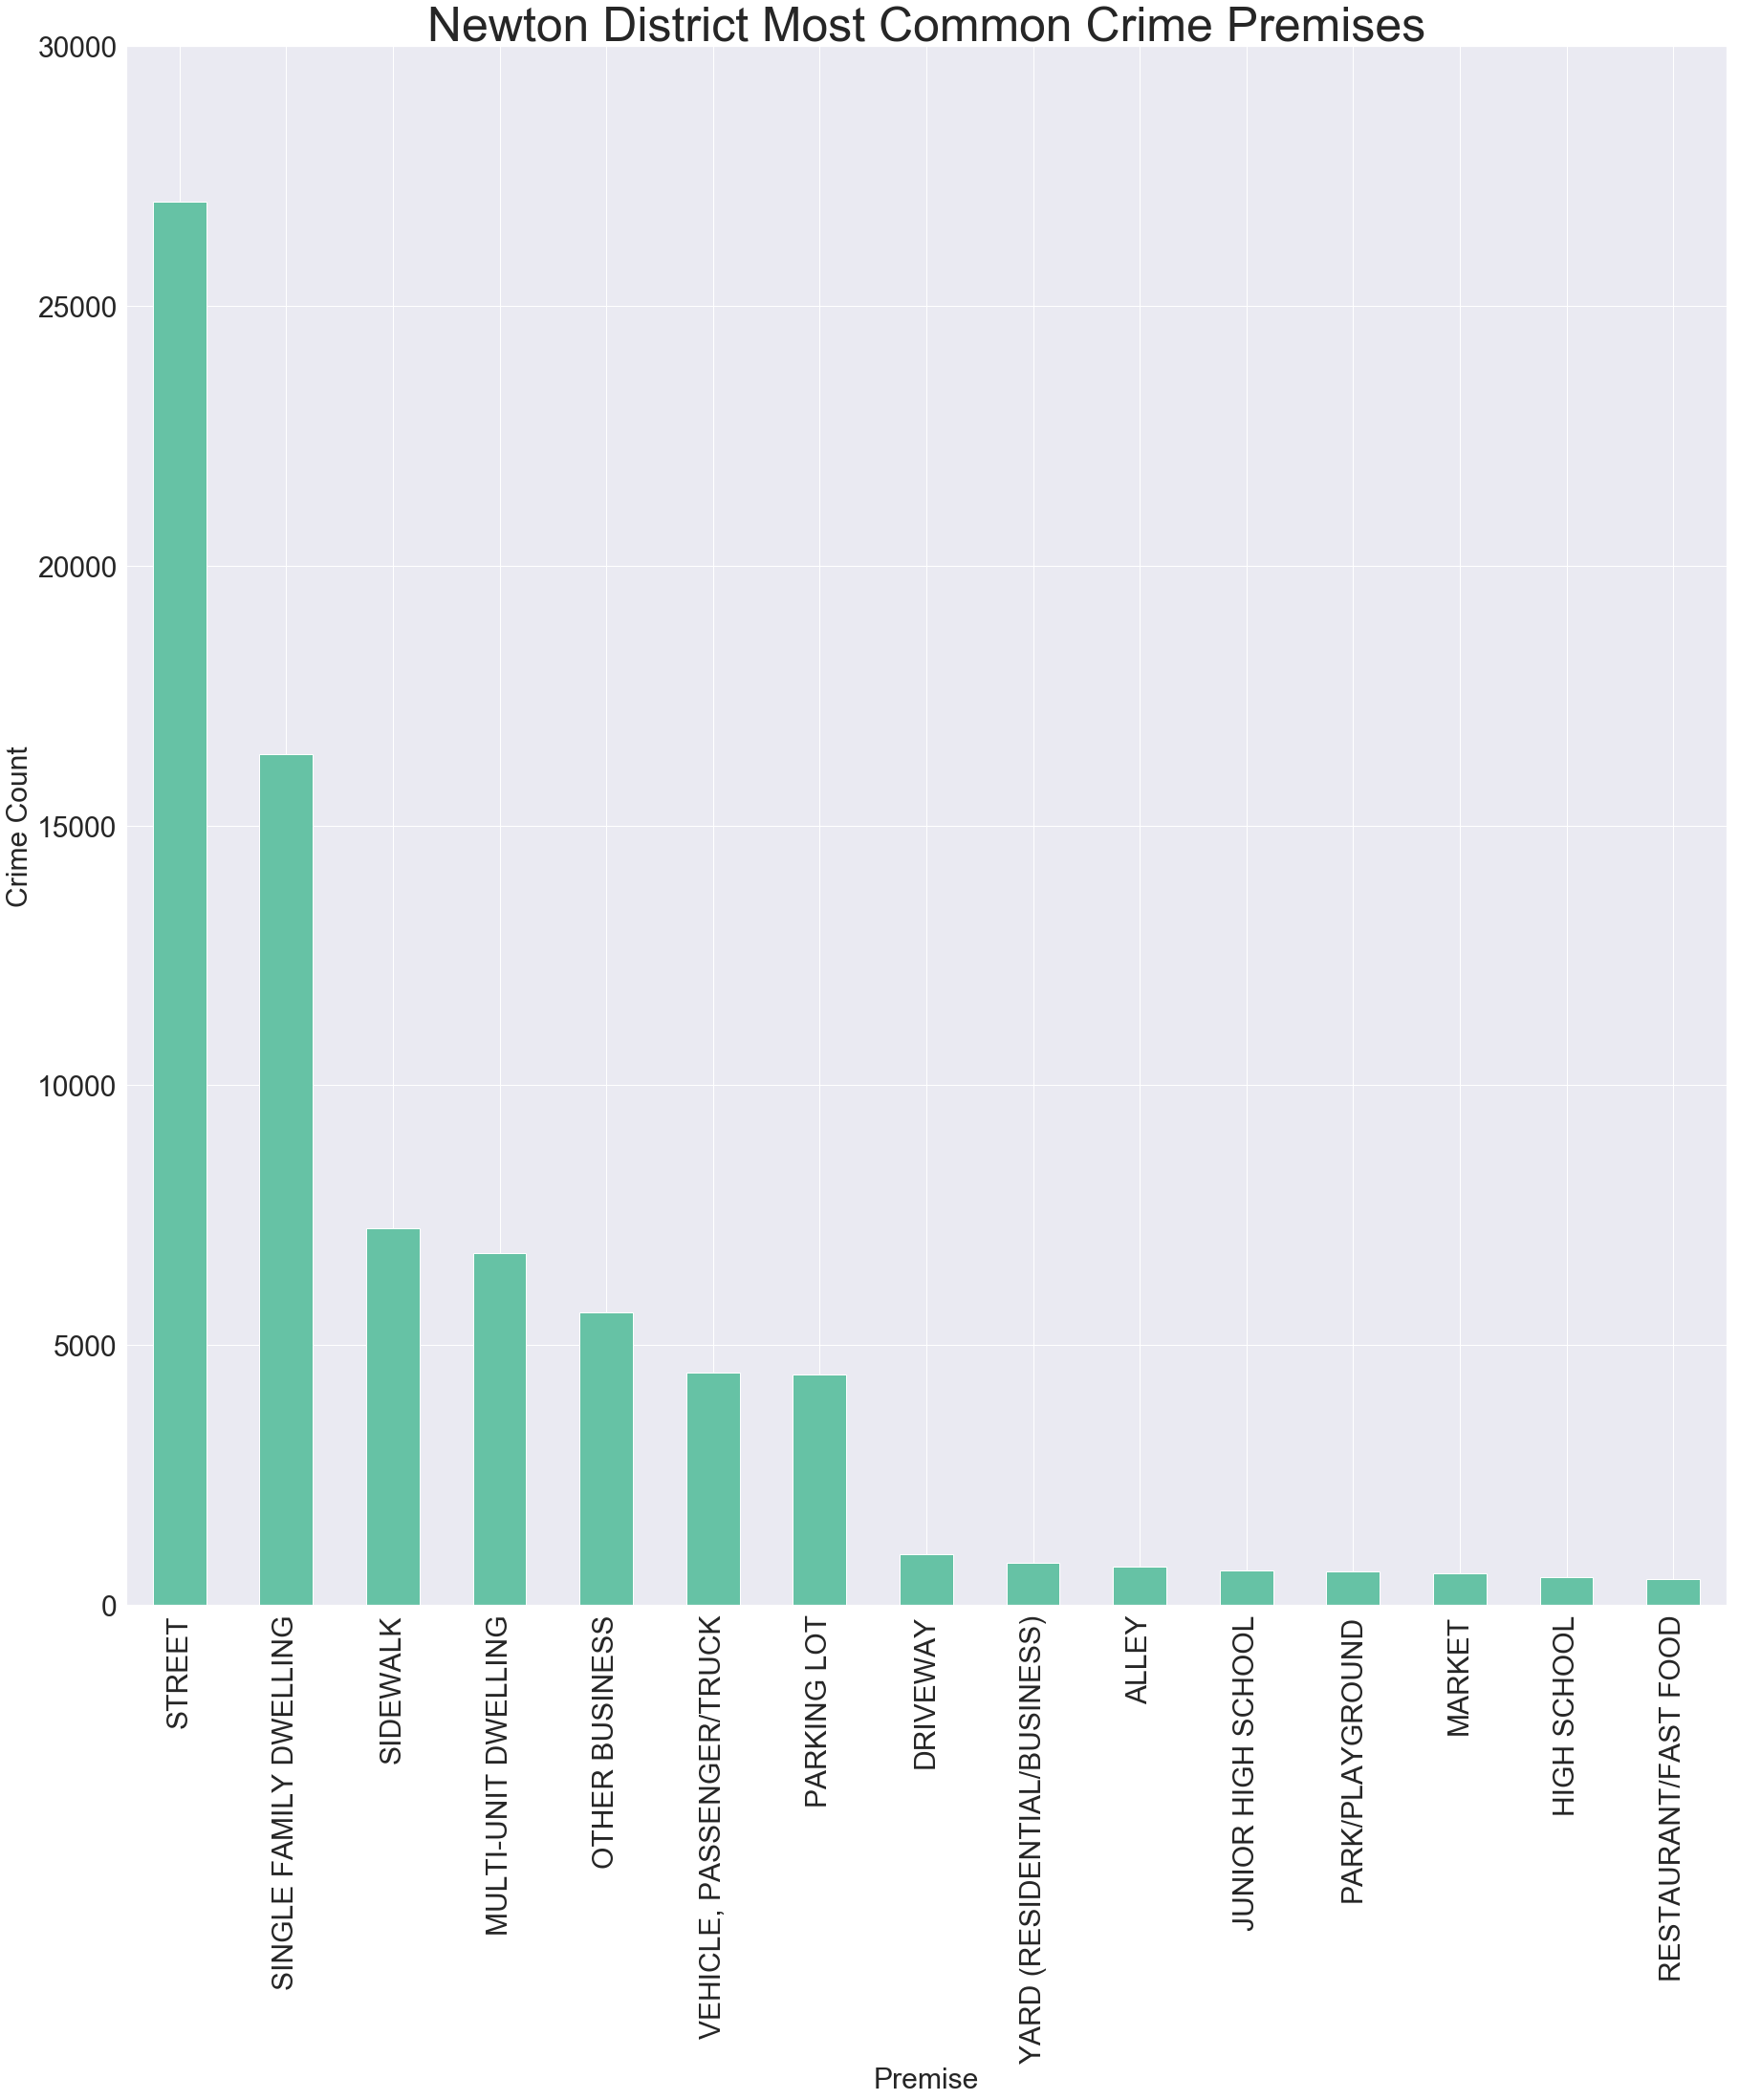

In [53]:
# Bar chart for Newton District - crime count by crime
crime_counter('Newton')

In [54]:
# Bar chart for Newton District - primise vs. crime count stacked by crime type 
prem_crime_counter('Newton')

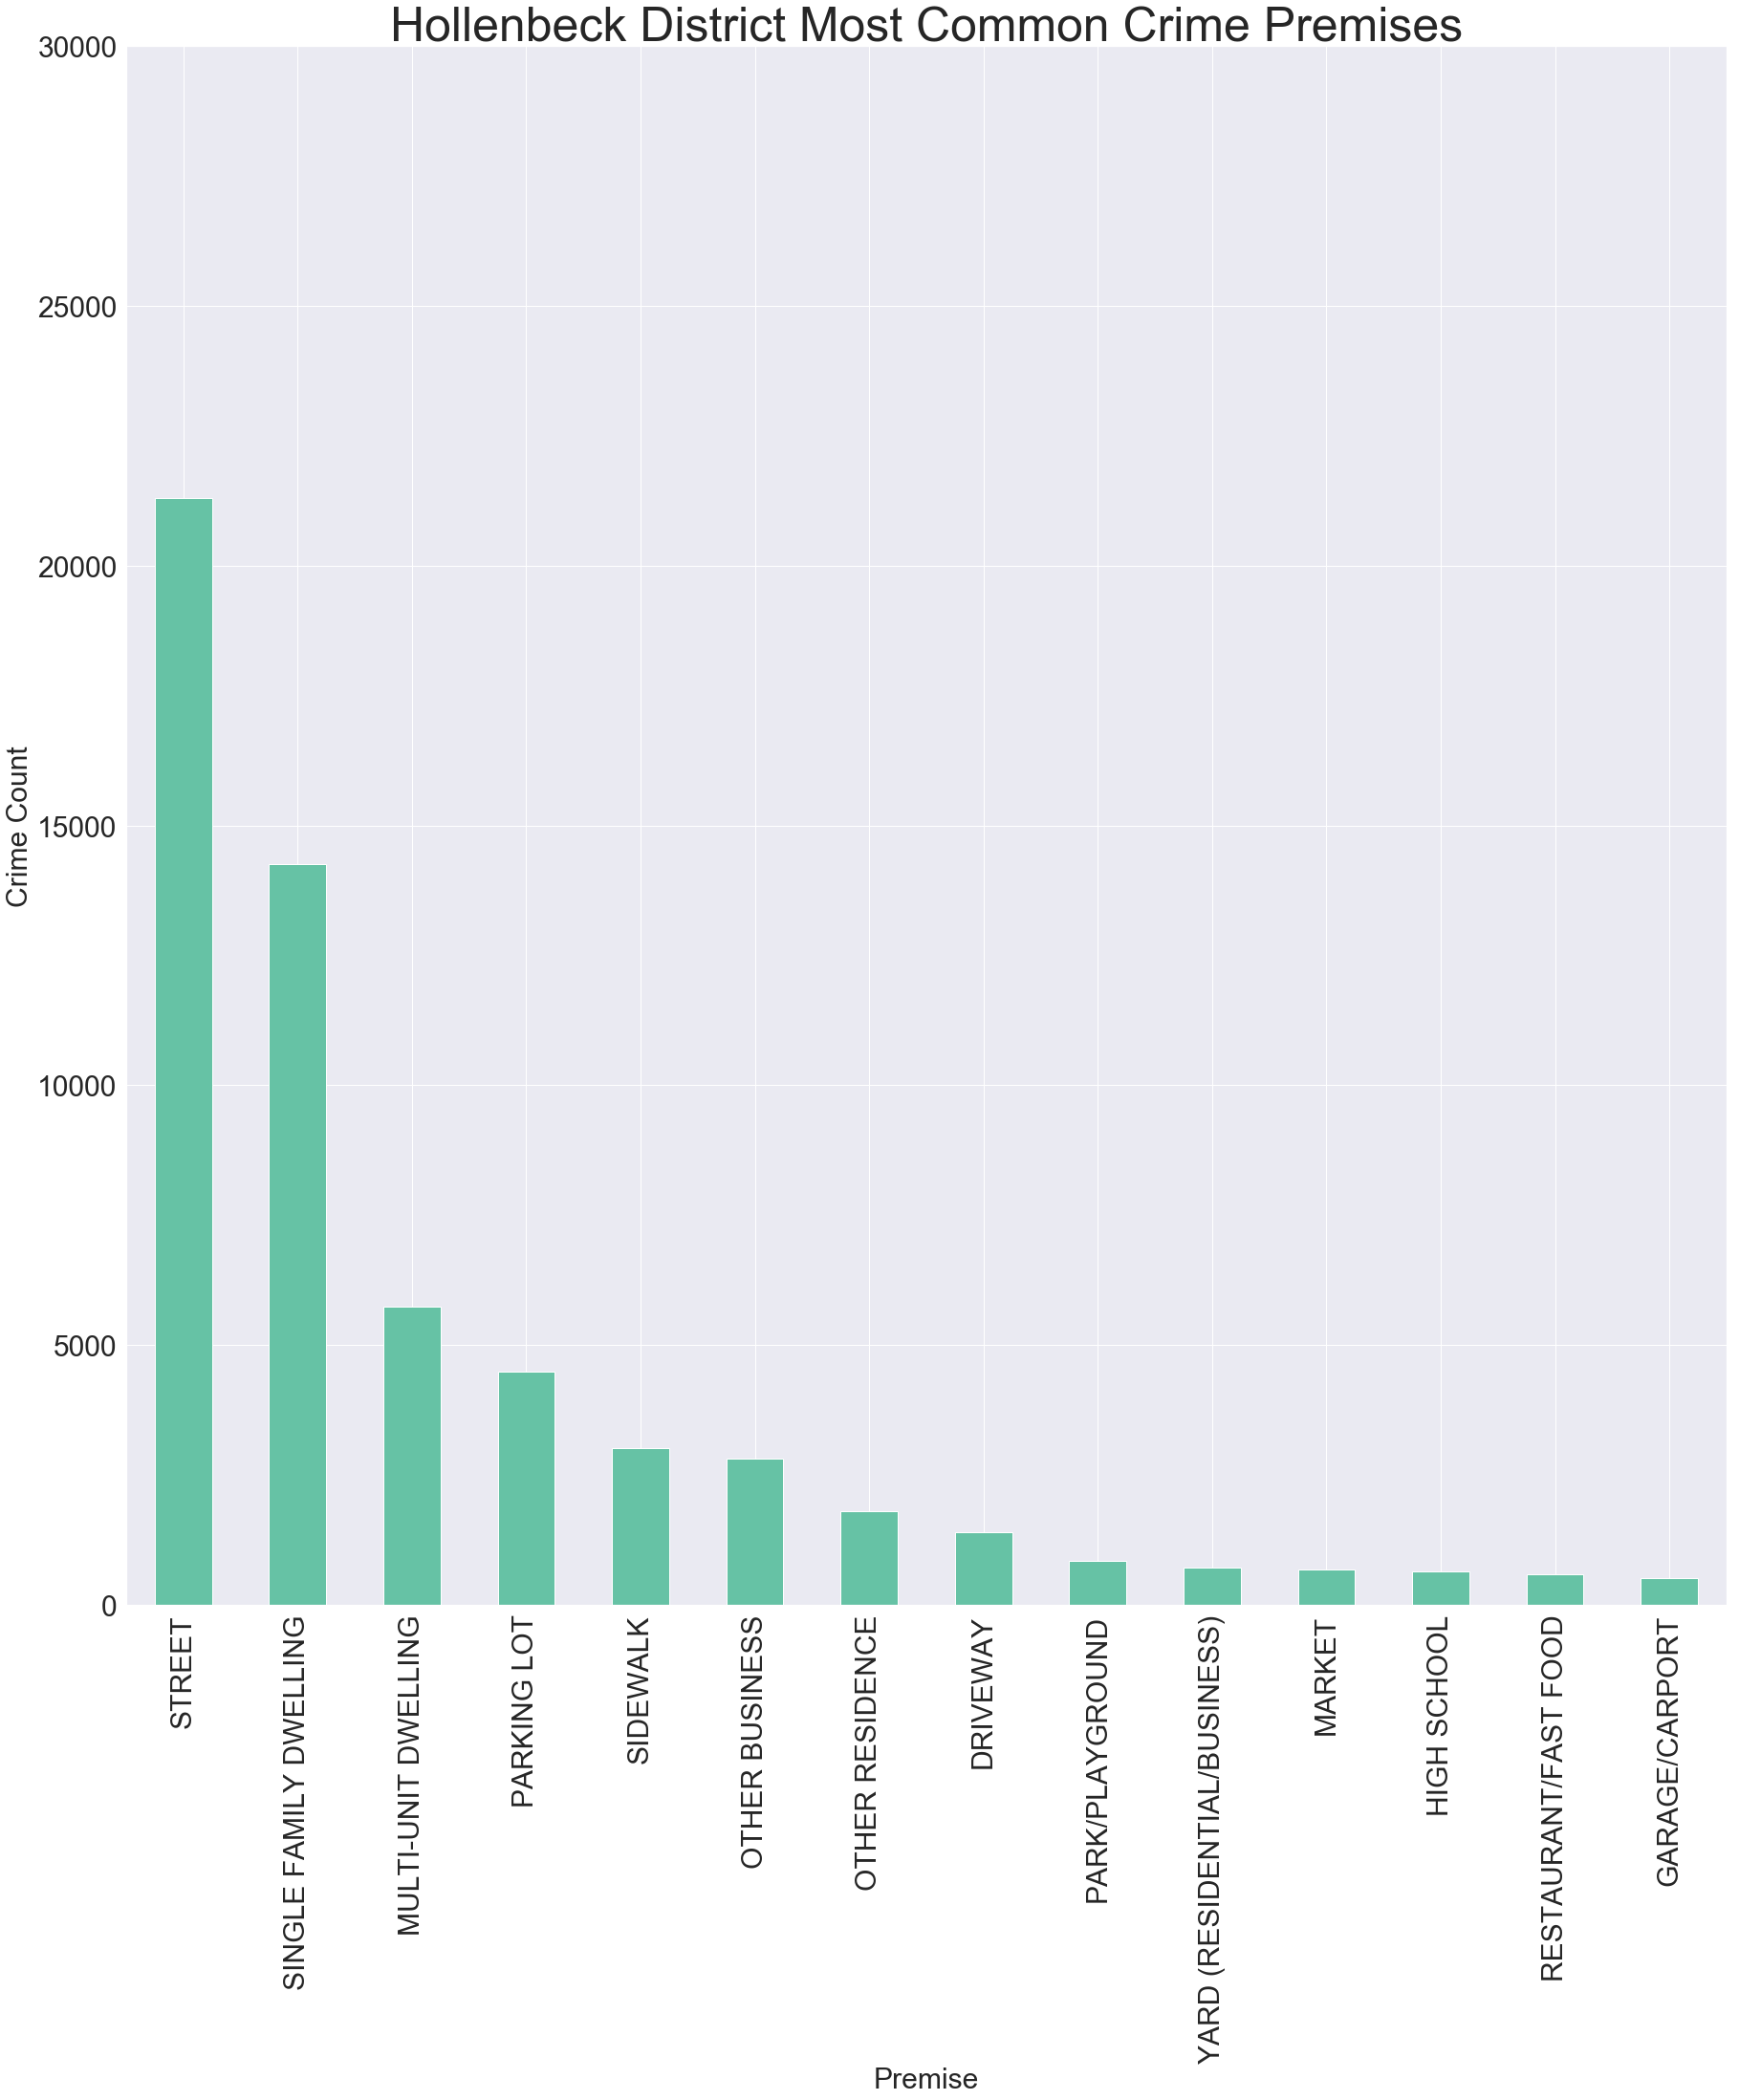

In [55]:
# Bar chart for Hollenbeck District - crime count by crime
crime_counter('Hollenbeck')

In [56]:
# Bar chart for Hollenbeck District - primise vs. crime count stacked by crime type 
prem_crime_counter('Hollenbeck')

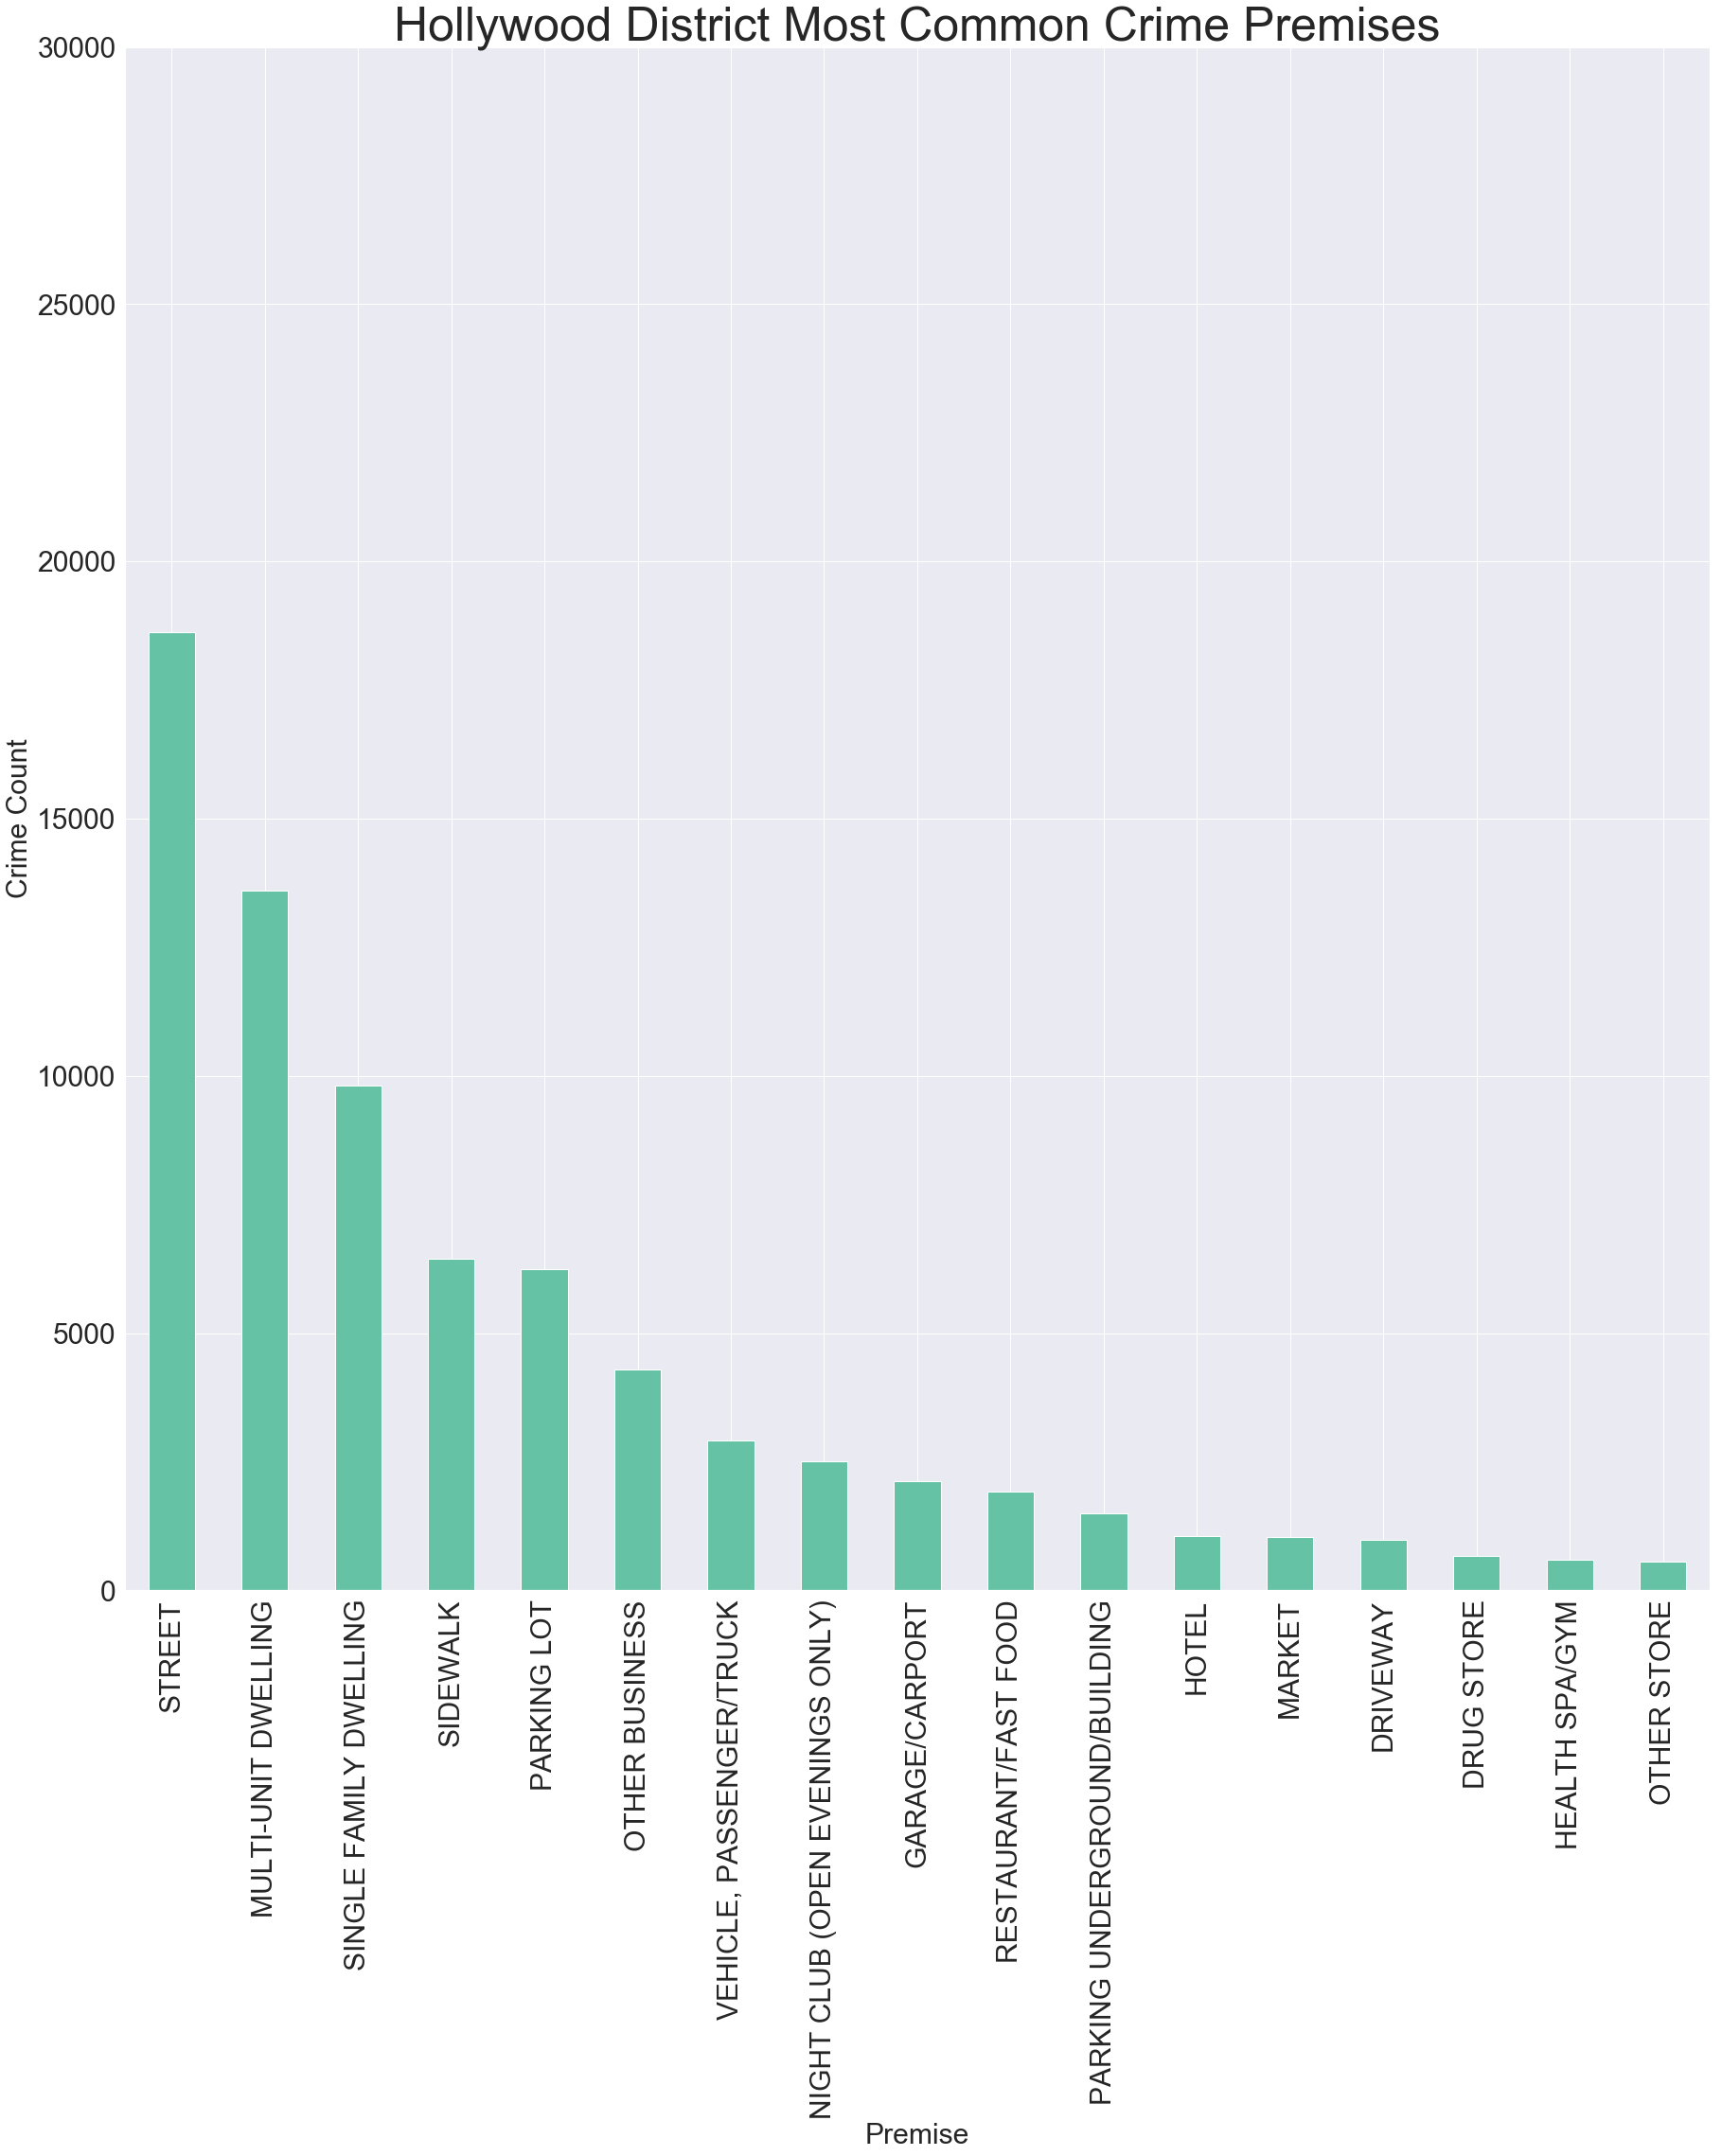

In [57]:
# Bar chart for Hollywood District - crime count by crime
crime_counter('Hollywood')

In [58]:
# Bar chart for Hollywood District - primise vs. crime count stacked by crime type 
prem_crime_counter('Hollywood')

### Looking into the trend of continuing investigations. What is the count of open investigations by year?  

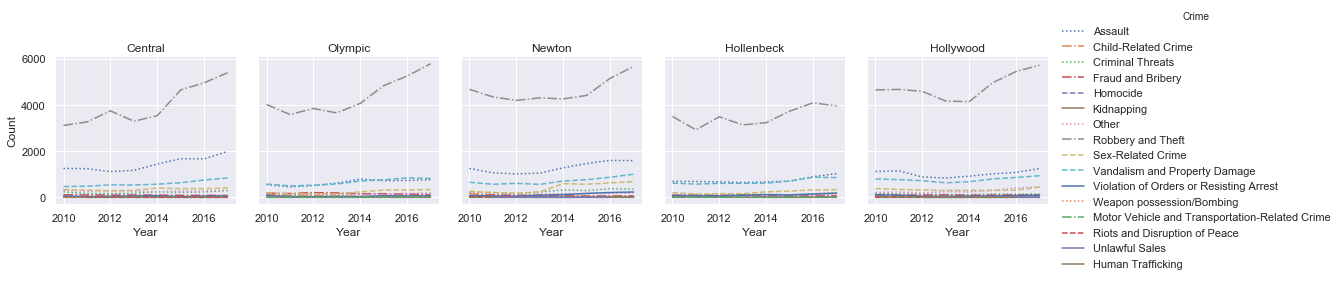

In [59]:
inv_cont=df.loc[:,['Date Occurred_Time Occurred','Crime','Status Description','Area Name']]
inv_cont=inv_cont[inv_cont['Status Description']=='Invest Cont']
inv_cont=inv_cont.set_index('Area Name')
inv_cont=inv_cont.loc[['Central','Olympic','Newton','Hollenbeck','Hollywood']]
inv_cont['Year']=inv_cont['Date Occurred_Time Occurred'].dt.year
inv_cont=inv_cont[inv_cont['Year']!=2018]
inv_cont.drop(columns=['Date Occurred_Time Occurred','Status Description'],inplace=True)
inv_cont=inv_cont.groupby(['Year','Area Name','Crime']).size().to_frame('Count')
inv_cont.reset_index(inplace=True)
g=sns.FacetGrid(inv_cont,col='Area Name',hue='Crime',palette='deep',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']},col_order=['Central','Olympic','Newton','Hollenbeck','Hollywood'])
g.map(plt.plot,'Year','Count')
g.add_legend()
g.set_titles("{col_name}")


Open investigations seem to grow as crime grows

### Primary crimes seem to be 'Robbery and Theft' and 'Assault'

Which subcategories of those crimes are the most relevant? 
2013 seems to be a breaking point after which crime in the focus areas began to climb drastically. 
Are there certain subcategories of the two major crimes that grew significantly ? 

In [60]:
dcrime_by_district=df.loc[:,['Area Name','Crime','Crime_Detailed','Date Occurred_Time Occurred']]
dcrime_by_district['Date Occurred']=dcrime_by_district['Date Occurred_Time Occurred'].dt.year

def pie_charter(crime,district):
    dcrime=dcrime_by_district[(dcrime_by_district['Area Name']==district) & (dcrime_by_district['Crime']==crime)]
    dcrime_before=dcrime[dcrime['Date Occurred']<2013]
    dcrime_after=dcrime[dcrime['Date Occurred']>=2013]
    dcrime_before=dcrime_before.groupby(['Crime_Detailed']).size().to_frame('Count')
    dcrime_after=dcrime_after.groupby(['Crime_Detailed']).size().to_frame('Count')
    figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
    dcrime_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
    dcrime_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
    figs.subplots_adjust(wspace=.5)
    axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_after.index)


#### Central district, Robbery and Theft - left (Before 2013), right (after 2013)

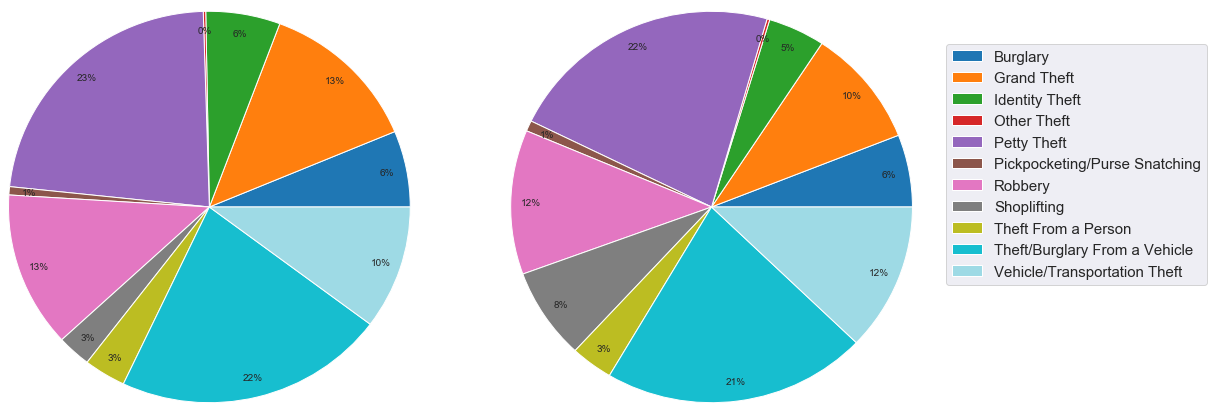

In [61]:
pie_charter('Robbery and Theft','Central')

#### Central district, Assault - left (Before 2013), right (after 2013)

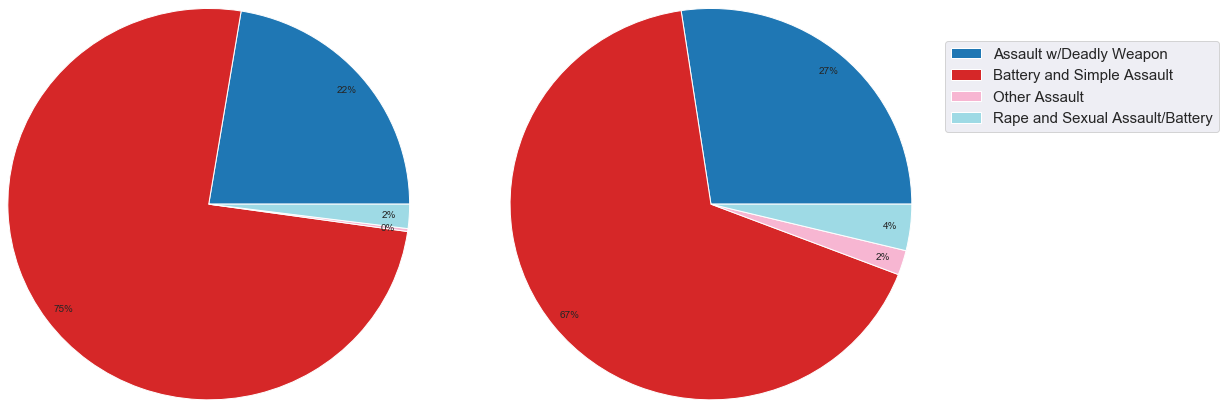

In [62]:
pie_charter('Assault','Central')

#### Olympic district, Robbery and Theft - left (Before 2013), right (after 2013)

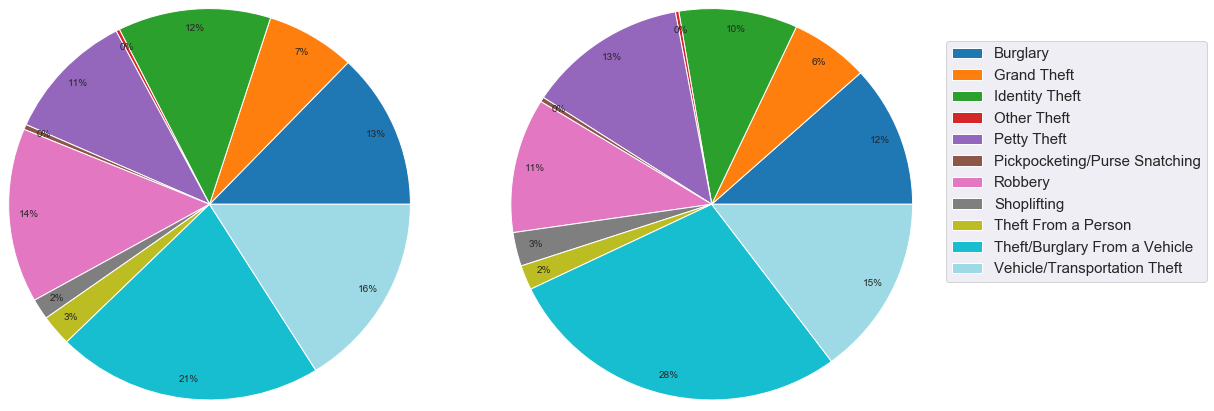

In [63]:
pie_charter('Robbery and Theft','Olympic')

#### Olympic district, Assault - left (Before 2013), right (after 2013)

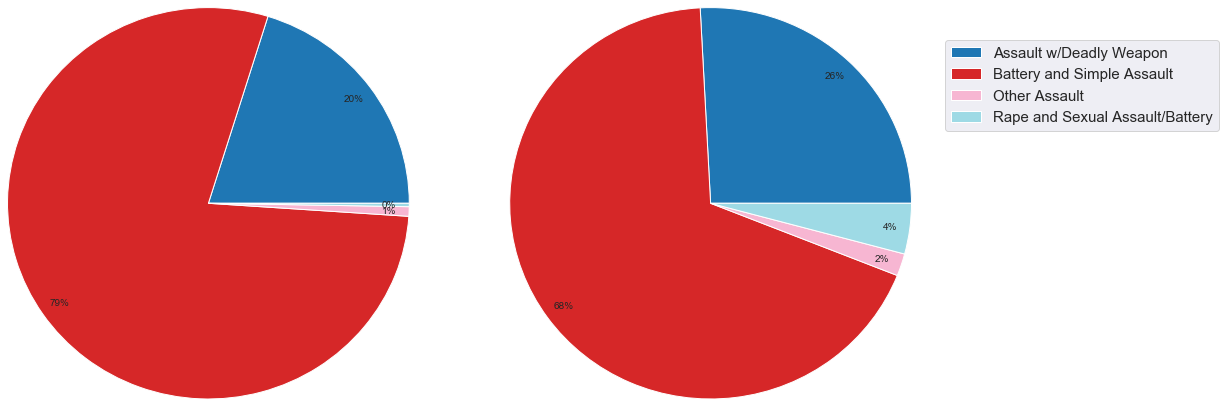

In [64]:
pie_charter('Assault','Olympic')

#### Hollenbeck district, Robbery and Theft - left (Before 2013), right (after 2013)

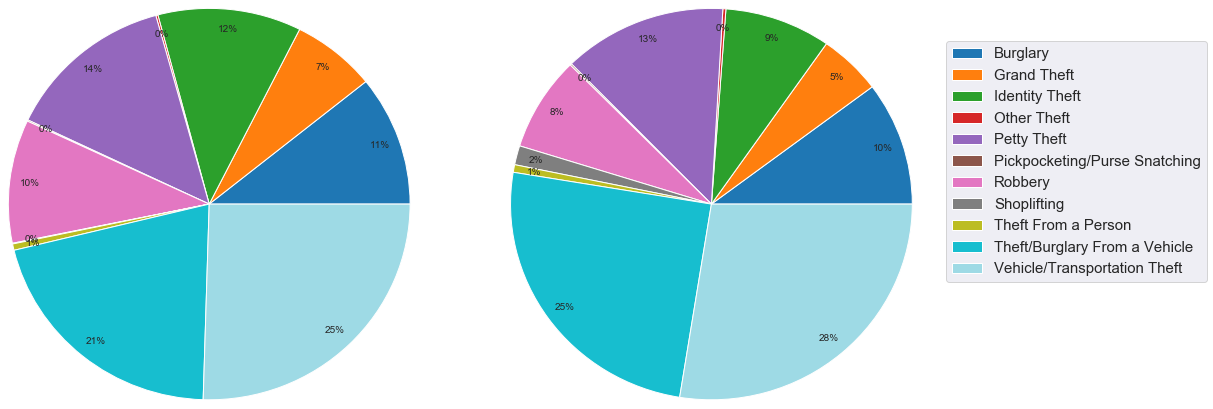

In [65]:
pie_charter('Robbery and Theft','Hollenbeck')

#### Hollenbeck district, Assault - left (Before 2013), right (after 2013)

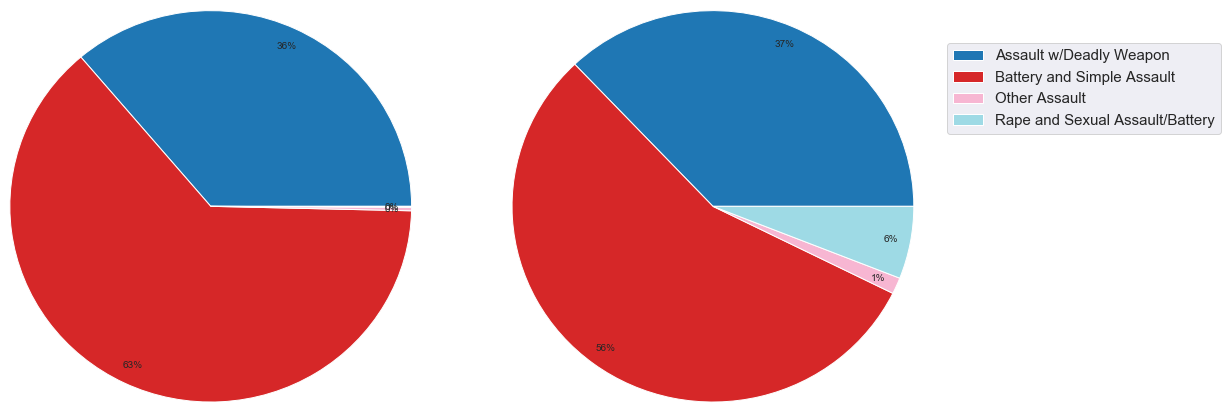

In [66]:
pie_charter('Assault','Hollenbeck')

#### Newton district, Robbery and Theft - left (Before 2013), right (after 2013)

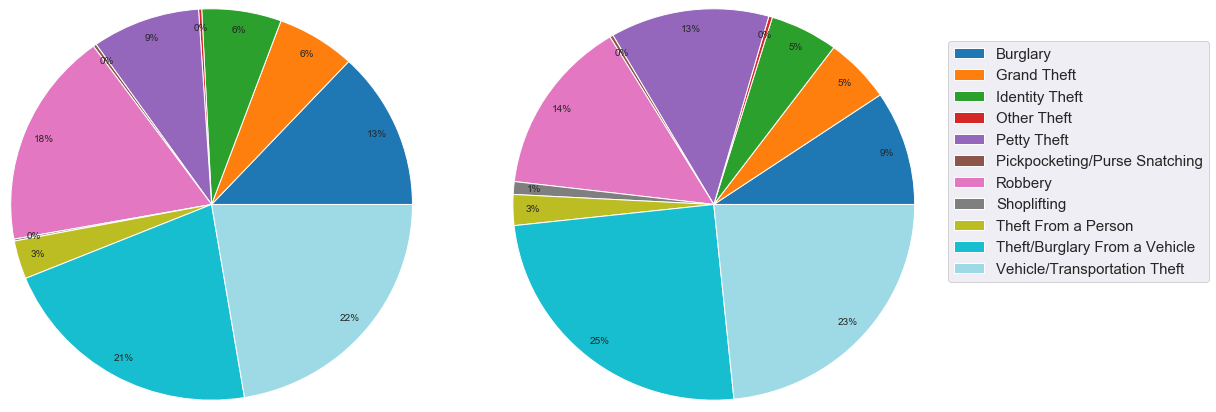

In [67]:
pie_charter('Robbery and Theft','Newton')

#### Newton district, Assault - left (Before 2013), right (after 2013)

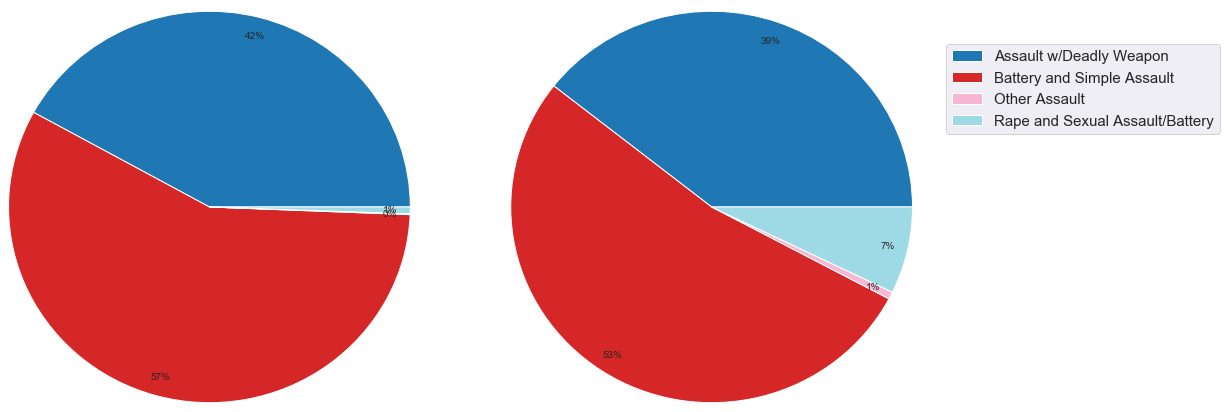

In [68]:
pie_charter('Assault','Newton')

#### Hollywood district, Robbery and Theft - left (Before 2013), right (after 2013)

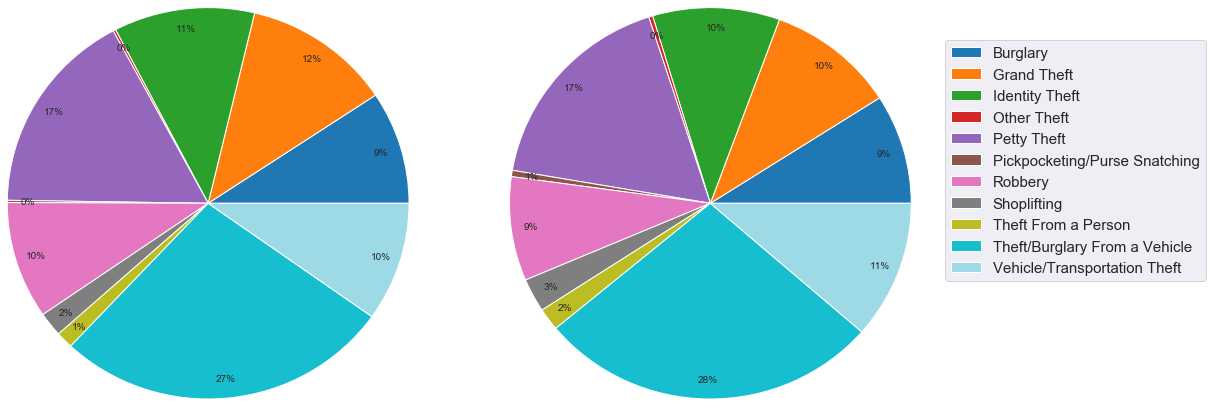

In [69]:
pie_charter('Robbery and Theft','Hollywood')

#### Newton district, Assault - left (Before 2013), right (after 2013)

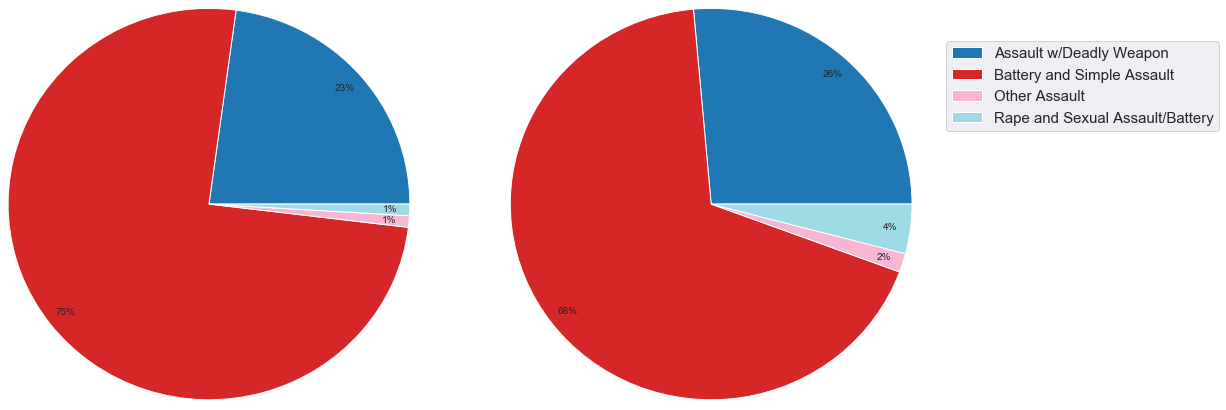

In [70]:
pie_charter('Assault','Hollywood')

In [71]:
def pie_charter_2(crime,district):
    dcrime_77th=dcrime_by_district[(dcrime_by_district['Area Name']==district) & (dcrime_by_district['Crime']==crime)]
    dcrime_77th=dcrime_77th.groupby(['Crime_Detailed']).size().to_frame('Count')
    dcrime_77th.plot.pie(y='Count',colormap='tab20',autopct='%1.0f%%',pctdistance=.90, radius=1.5,figsize=(5,5),labels=None)
    plt.legend(bbox_to_anchor=(1.5,1),labels=dcrime_77th.index)

#### 77th Street district, Robbery and Theft - did not appear to significantly increase after 2013

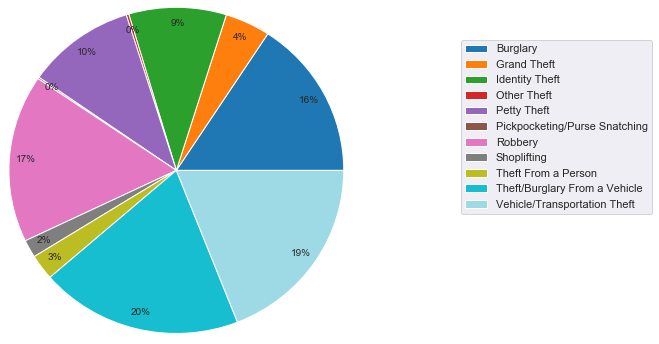

In [72]:
pie_charter_2('Robbery and Theft','77th Street')

#### 77th Street district, Assault  - did not appear to significantly increase after 2013

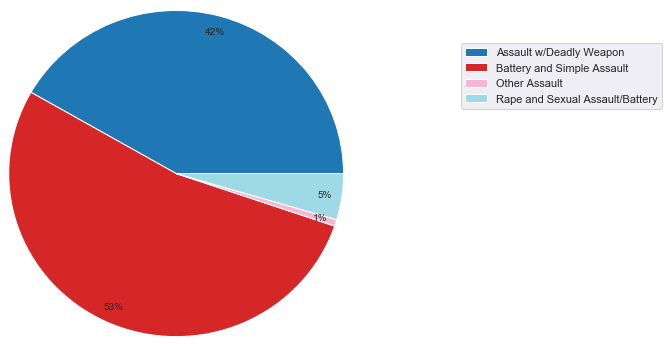

In [73]:
pie_charter_2('Assault','77th Street')

#### Southwest district, Robbery and Theft - did not appear to significantly increase after 2013

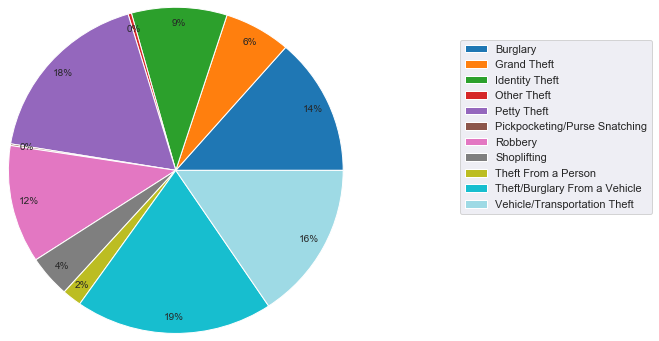

In [74]:
pie_charter_2('Robbery and Theft','Southwest')

#### Southwest district, Assault - did not appear to significantly increase after 2013

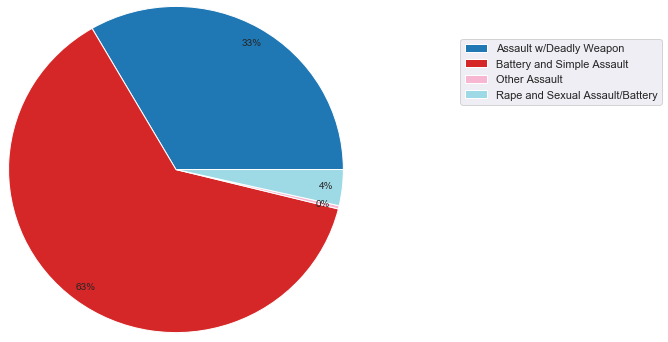

In [75]:
pie_charter_2('Assault','Southwest')

### What are the peak times of crime in the 6 districts??? 

Looking at the crime trend is seems to peak throughout the day (10 am - 10 pm) and die down after 2 am. 

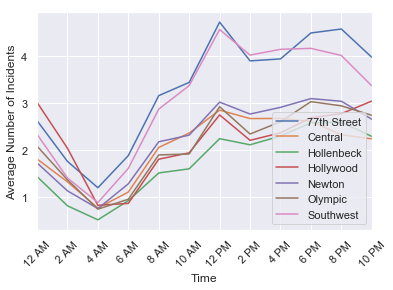

In [76]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_rising=crime_time[(crime_time['Area Name']=='Central')| (crime_time['Area Name']=='Olympic')|(crime_time['Area Name']=='Newton') | (crime_time['Area Name']=='Hollenbeck')|(crime_time['Area Name']=='77th Street')|(crime_time['Area Name']=='Southwest')|(crime_time['Area Name']=='Hollywood')]
crime_time_rising.set_index(['Date Occurred_Time Occurred'],inplace=True)
crime_time_rising=crime_time_rising.groupby('Area Name')
crime_time_rising=crime_time_rising.resample('2H').count()
crime_time_rising.drop(columns='Area Name',inplace=True)
crime_time_rising.reset_index(inplace=True)
crime_time_rising['Time Occurred']=crime_time_rising['Date Occurred_Time Occurred'].dt.time
crime_time_rising.drop(columns='Date Occurred_Time Occurred',inplace=True)
crime_time_rising=crime_time_rising.groupby(['Time Occurred','Area Name'])['Crime Code Description'].mean().to_frame('Average')
crime_time_rising=crime_time_rising.unstack(level='Area Name')
crime_time_rising.plot()
ax=plt.gca() 
ax.set_xticks(crime_time_rising.index)
plt.xlim(crime_time_rising.index[0],crime_time_rising.index[-1])
ax.set_xticklabels(['12 AM','2 AM','4 AM','6 AM','8 AM','10 AM','12 PM','2 PM','4 PM','6 PM','8 PM','10 PM'],rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Number of Incidents')
plt.legend(loc='lower right',labels=['77th Street','Central','Hollenbeck','Hollywood','Newton','Olympic','Southwest'])

### Which victim descents are the most prominent and what crime affect them?

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text yticklabel objects>)

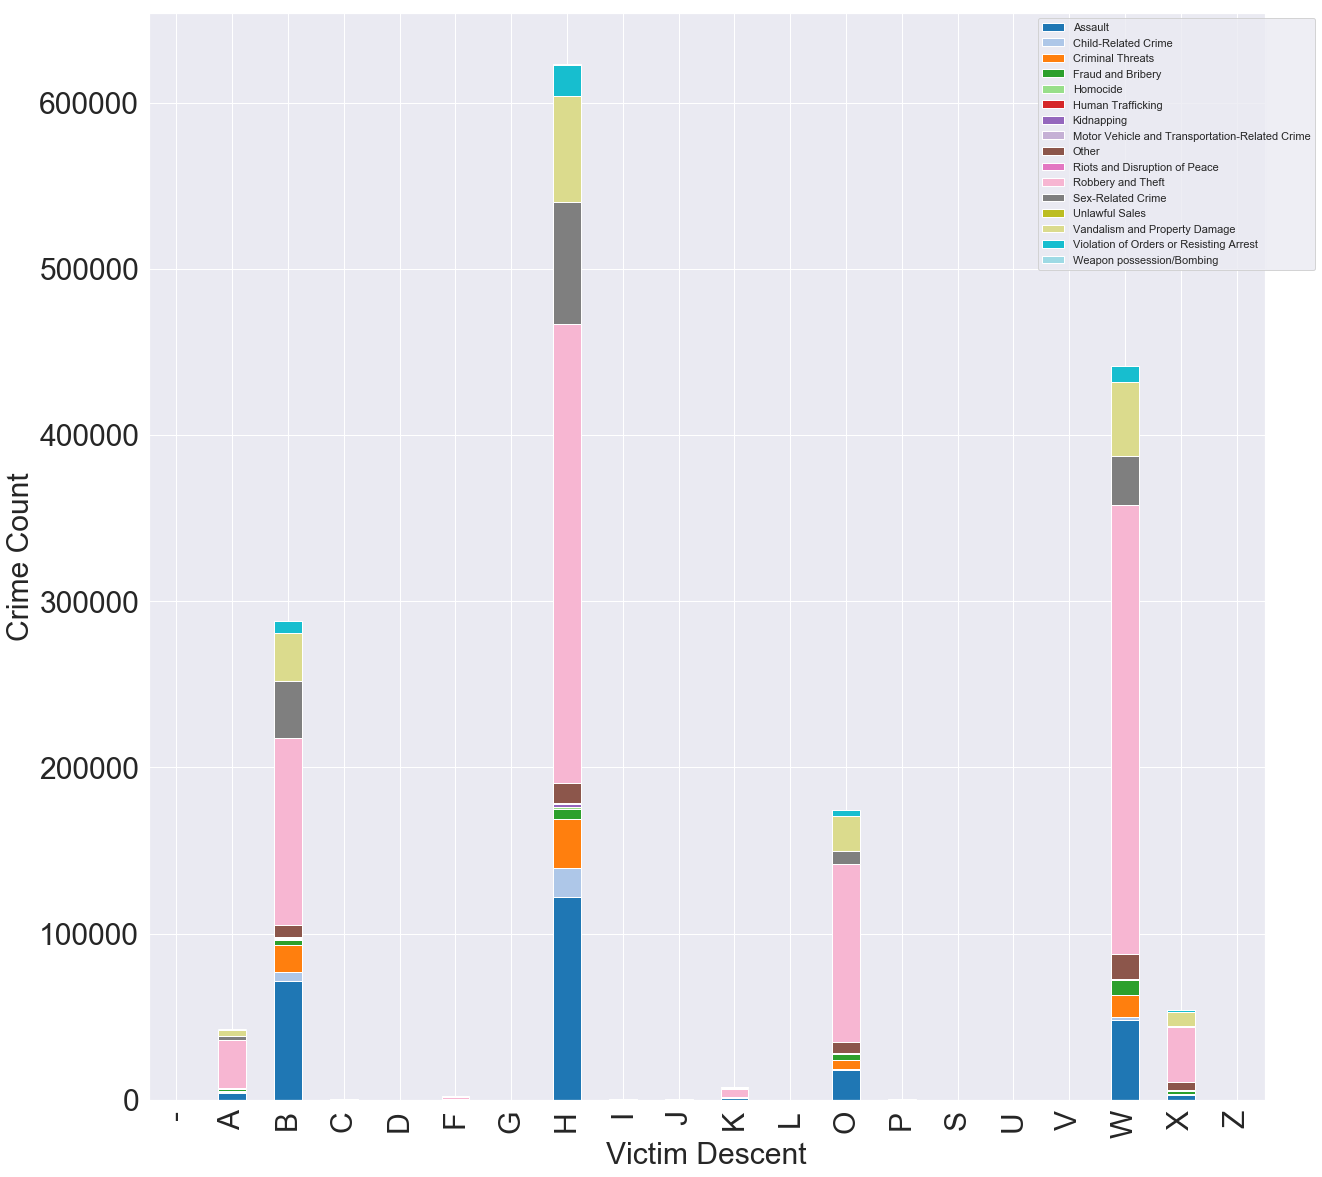

In [80]:
descent_crime=df.loc[:,['Victim Descent','Crime']]
descent_crime=descent_crime[descent_crime['Victim Descent']!='Missing']
descent_crime=descent_crime.groupby(['Victim Descent','Crime']).size().to_frame('Count')
descent_crime=descent_crime.unstack(level='Crime',fill_value=0)
descent_crime['Count'].plot(kind='bar',stacked=True,colormap='tab20',figsize=(20,20))
plt.legend(bbox_to_anchor=(1.05,1))
plt.ylabel('Crime Count',fontsize=30)
plt.xlabel('Victim Descent',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)